In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


In [2]:
DATA_PATH = "/home/matv864/it/AI_work/data/billionaires.csv"
SAVE_DATA_PATH = "/home/matv864/it/AI_work/data/billionaires_ready.csv"

In [3]:
# import kagglehub


# # Download latest version
# path = kagglehub.dataset_download(
#     "nelgiriyewithana/billionaires-statistics-dataset",
# )

# print("Path to dataset files:", path)

In [4]:
df = pd.read_csv(DATA_PATH)
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [5]:
df = df.dropna(thresh=df.shape[1] - 5)
df.shape

(2398, 35)

In [6]:
column = "rank"


In [7]:
column = "finalWorth"


In [8]:
column = "category"
# unique 18

# df = df.drop(column, axis=1)
df[column].isna().sum()/df[column].count()

np.float64(0.0)

In [9]:
column = "personName"
# don't need

df = df.drop(column, axis=1)

In [10]:
column = "age"
# loss 2%
# after soft clean 3 nan - 0%

df[column].isna().sum()/df[column].count()

# df = df.drop(column, axis=1)

np.float64(0.0)

In [11]:
column = "country"
# loss 1%
# unique 78

# 3 main and other

df = df.drop(column, axis=1)

In [12]:
column = "city"
# loss 3%
# unique 741

df = df.drop(column, axis=1)

In [13]:
column = "source"
# unique 908

df = df.drop(column, axis=1)
# df["source"].unique()

In [14]:
column = "industries"
# unique 18

df = df.drop(column, axis=1)

In [15]:
column = "countryOfCitizenship"
# unique 77

df = df.drop(column, axis=1)

In [16]:
column = "organization"
# very small amount of information 
# loss 88%

df = df.drop(column, axis=1)

In [17]:
column = "selfMade"
# ready in True/False

# yes_no_dict = {
#     True: 1,
#     False: 0
# }

# df[column] = df[column].map(yes_no_dict)


In [18]:
column = "status"
# unique 6

df = df.drop(column, axis=1)
# df["status"]

In [19]:
column = "gender"
print(df[column])


def convert_to_is_male(gender: str | None) -> bool:
    match gender:
        case "M":
            return True
        case "F":
            return False
        case _:
            print("ERRROR")
            0/0


df[column] = (
    df[column]
    .apply(convert_to_is_male)
)

df = df.rename(columns={'gender': 'is_male'})
# df = df.drop(column, axis=1)

0       M
1       M
2       M
3       M
4       M
       ..
2635    M
2636    M
2637    M
2638    M
2639    M
Name: gender, Length: 2398, dtype: object


In [20]:
column = "birthDate"

def convert_to_date(date: str | None) -> datetime:
    if type(date) is str:
        return datetime.strptime(date, r'%m/%d/%Y %H:%M').timestamp()
    return date

df[column] = (
    df[column]
    .apply(convert_to_date)
)

mean_timestamp = df[column].dropna().astype('int64').mean()
mean_date = pd.to_datetime(mean_timestamp)

df[column] = df[column].fillna(mean_date)

# df = df.drop(column, axis=1)

In [21]:
column = "lastName"



df = df.drop(column, axis=1)

In [22]:
column = "firstName"

df[column] = df[column].dropna()

df = df.drop(column, axis=1)

In [23]:
column = "title"
# loss 87%

df = df.drop(column, axis=1)

In [24]:
column = "date"
# not interesting


df = df.drop(column, axis=1)

In [25]:
column = "state"
# not interested

df = df.drop(column, axis=1)

In [26]:
column = "residenceStateRegion"
# not interested

df = df.drop(column, axis=1)

In [27]:
column = "birthYear"
# we have birthDate

# df = df.drop(column, axis=1)

In [28]:
column = "birthMonth"
# we have birthDate

# df = df.drop(column, axis=1)

In [29]:
column = "birthDay"
# we have birthDate

# df = df.drop(column, axis=1)

In [30]:
column = "cpi_country"
# loss 7%
# after soft clean 3 nan - <0.001%

print(df[column].isna().sum()/df[column].count())
df[column] = df[column].dropna()
print(df[column].isna().sum()/df[column].count())
# df = df.drop(column, axis=1)

0.00041718815185648727
0.00041718815185648727


In [31]:
column = "cpi_change_country"
# loss 7%
# after soft clean 3 nan - <0.001%

print(df[column].isna().sum()/df[column].count())
df[column] = df[column].dropna()
print(df[column].isna().sum()/df[column].count())
# df = df.drop(column, axis=1)

0.00041718815185648727
0.00041718815185648727


In [32]:
column = "gdp_country"
# loss 6%
# after soft clean 3 nan - 0%

def from_dollars_to_int(string: str) -> int:
    return int(string.replace("$", "").replace(",", ""))

print(df[column].isna().sum()/df[column].count())

df[column] = df[column].apply(from_dollars_to_int)

# df = df.drop(column, axis=1)

0.0


In [33]:
column = "gross_tertiary_education_enrollment"
# loss 7%
# after soft clean 3 nan - 0%

print(df[column].isna().sum()/df[column].count())

# df = df.drop(column, axis=1)

0.0


In [34]:
column = "gross_primary_education_enrollment_country"
# loss 7%
# after soft clean 3 nan - 0%

print(df[column].isna().sum()/df[column].count())

# df = df.drop(column, axis=1)

0.0


In [35]:
column = "life_expectancy_country"
# loss 7%
# after soft clean 3 nan - 0%

print(df[column].isna().sum()/df[column].count())

# df = df.drop(column, axis=1)

0.0


In [36]:
column = "tax_revenue_country_country"
# loss 7%
# after soft clean 3 nan - 0%

print(df[column].isna().sum()/df[column].count())

# df = df.drop(column, axis=1)

0.0


In [37]:
column = "total_tax_rate_country"
# loss 7%
# after soft clean 3 nan - 0%

print(df[column].isna().sum()/df[column].count())



# df = df.drop(column, axis=1)

0.0


In [38]:
column = "population_country"
# loss 6%
# after soft clean 3 nan - 0%

print(df[column].isna().sum()/df[column].count())


# df = df.drop(column, axis=1)

0.0


In [39]:
column = "latitude_country"
# loss 6%
# after soft clean 3 nan - 0%

print(df[column].isna().sum()/df[column].count())



# df = df.drop(column, axis=1)

0.0


In [40]:
column = "longitude_country"
# loss 6%
# after soft clean 3 nan - 0%

print(df[column].isna().sum()/df[column].count())

# df = df.drop(column, axis=1)

0.0


In [41]:
print(df.shape)
df = df.dropna()
print(df.shape)

# df = (
#     df
#     .drop("birthDate", axis=1)
#     .drop("birthYear", axis=1)
#     .drop("birthMonth", axis=1)
#     .drop("birthDay", axis=1)
# )

(2398, 21)
(2397, 21)


In [42]:
df.to_csv(SAVE_DATA_PATH.format(1))

In [43]:
# Compute the correlation matrix of the variables
diamonds_corr_matrix = df.corr()
print(diamonds_corr_matrix)

# Create the heatmap using the `heatmap` function of Seaborn
sns.heatmap(diamonds_corr_matrix, cmap='coolwarm')

# Display the heatmap using the `show` method of the `pyplot` module from matplotlib.
plt.show()

ValueError: could not convert string to float: 'Fashion & Retail'

# try to clusterization

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)


In [ ]:
wcss = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=777)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

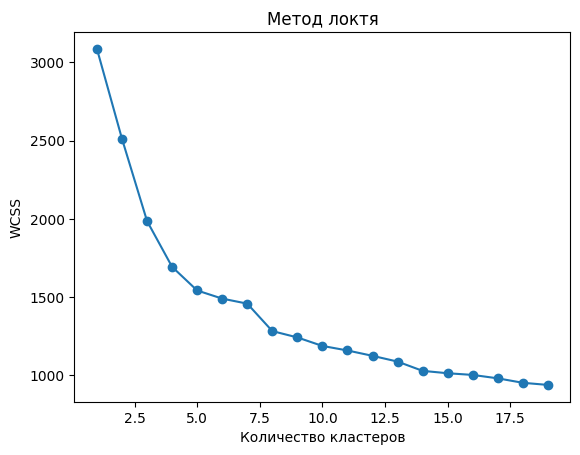

In [ ]:
plt.plot(range(1, 20), wcss, marker="o")
plt.xlabel("Количество кластеров")
plt.ylabel("WCSS")
plt.title("Метод локтя")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=777)
kmeans.fit(scaled_data)

KMeans(n_clusters=5, random_state=777)

In [ ]:
clusters = kmeans.fit_predict(scaled_data)

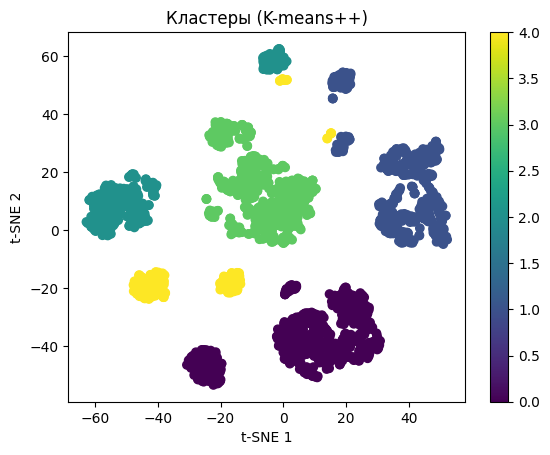

In [ ]:
tsne = TSNE(n_components=2, random_state=1984)
projected_data = tsne.fit_transform(scaled_data)

plt.scatter(projected_data[:, 0], projected_data[:, 1], c=clusters, cmap="viridis")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("Кластеры (K-means++)")
plt.colorbar()
plt.show()

In [ ]:
df['Cluster'] = clusters
cluster_stats = df.groupby('Cluster').mean()
cluster_stats

,rank,finalWorth,age,selfMade,is_male,birthDate,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
Cluster,,,,,,,,,,,,,,,,,,,,
0,1124.752577,5951.840943,67.178203,0.795287,0.964654,-4.544491e+08,1955.128130,6.232695,15.041237,117.240000,7.500000,2.142770e+13,88.200000,101.800000,78.500000,9.600000,36.600000,3.282395e+08,37.090240,-95.712891
1,1474.226212,3551.705566,59.660682,0.983842,0.921005,-2.152977e+08,1962.820467,5.102334,7.639138,131.739102,3.477379,1.782915e+13,47.893537,101.739677,76.085817,9.616517,58.057271,1.393950e+09,34.025117,101.160247
2,1266.664835,4995.054945,66.565934,0.000000,1.000000,-4.347607e+08,1955.788462,5.868132,12.758242,137.248187,3.148901,1.900233e+12,55.403846,106.141209,77.629670,15.193956,43.198352,3.559528e+08,28.928620,38.589577
3,1322.018456,4099.161074,66.703020,1.000000,0.976510,-4.390302e+08,1955.652685,5.864094,13.144295,132.768054,2.544295,1.588858e+12,67.279866,102.930705,79.330369,16.407886,39.648993,7.007920e+07,35.987441,43.333813
4,1121.656716,5602.487562,64.054726,0.000000,0.000000,-3.559241e+08,1958.323383,5.442786,12.368159,121.904428,4.259204,9.660325e+12,74.125871,103.514428,79.570149,14.718408,42.138806,2.613169e+08,36.096849,-17.270275
